In [68]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,  normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [69]:
data = pd.DataFrame(pd.read_csv('../sample_data/cc_general.csv'))

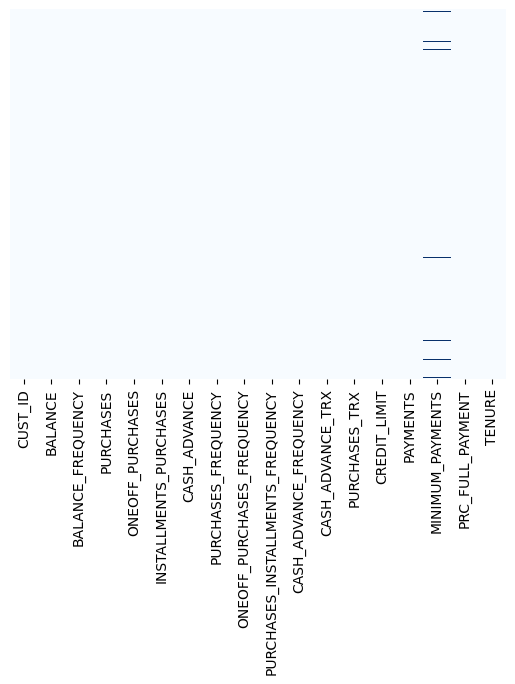

In [70]:
sns.heatmap(data.isnull(),cmap="Blues",yticklabels=False,cbar=False)
plt.show()

In [73]:
data.loc[(data['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = data.MINIMUM_PAYMENTS.mean()
data.loc[(data['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = data.CREDIT_LIMIT.mean()

In [74]:
data.drop("CUST_ID",axis=1,inplace=True)

C:\Users\aryan\AppData\Local\Temp\ipykernel_10436\1911652840.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.columns[i]])
C:\Users\aryan\AppData\Local\Temp\ipykernel_10436\1911652840.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.columns[i]])
C:\Users\aryan\AppData\L

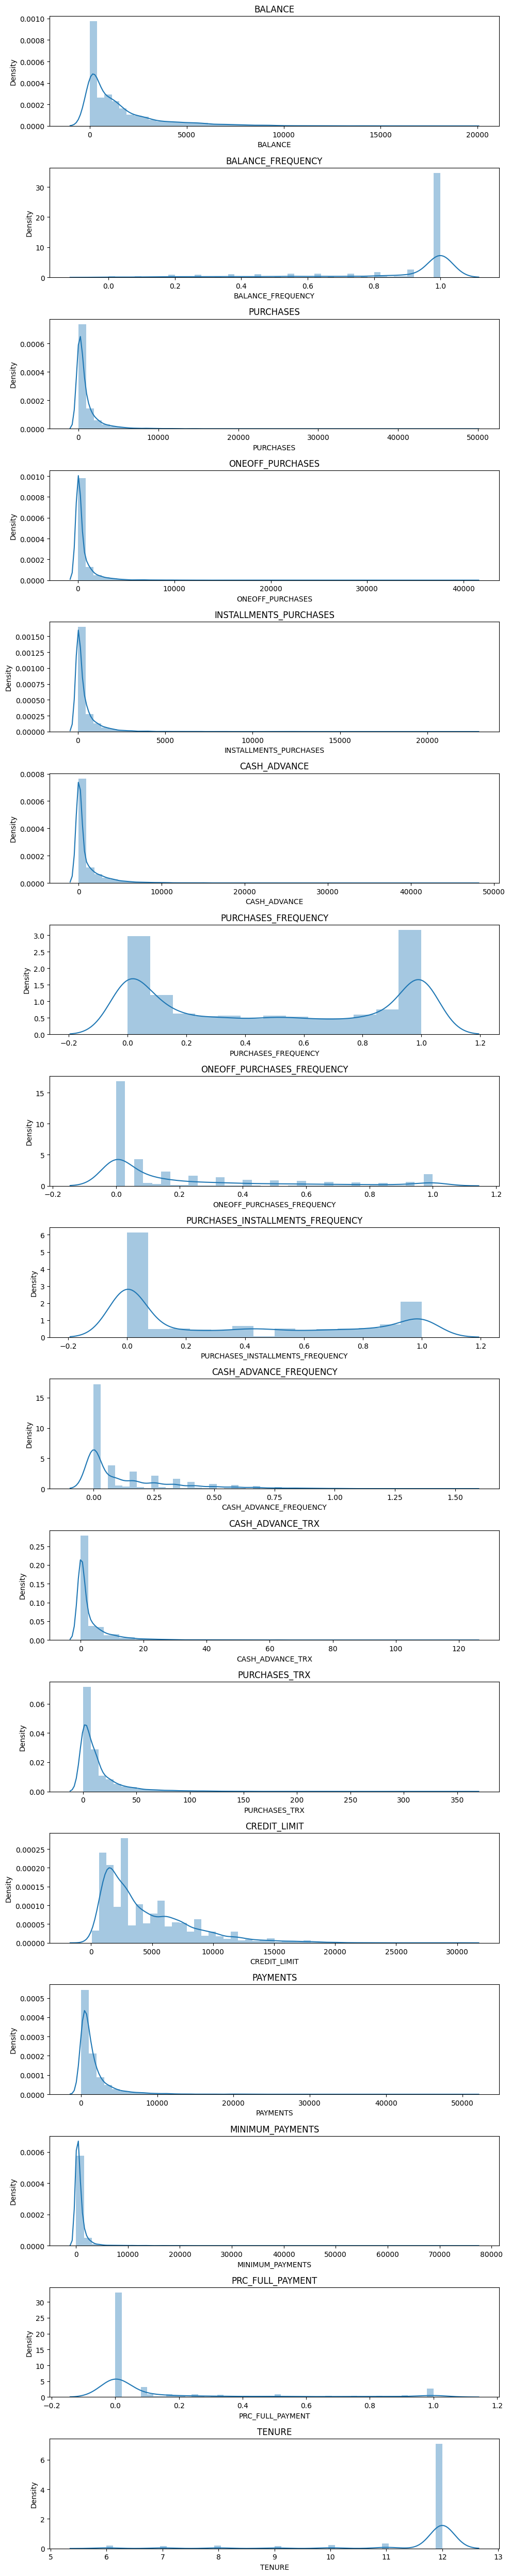

In [75]:
plt.figure(figsize=(10,50))
for i in range(len(data.columns)):
    plt.subplot(len(data.columns),1,i+1)
    sns.distplot(data[data.columns[i]])
    plt.title(data.columns[i])
plt.tight_layout()

In [77]:
scale = StandardScaler()
scale_data = scale.fit_transform(data)

In [79]:
kmeans = KMeans(7)
kmeans.fit(scale_data)
labels = kmeans.labels_
centres = kmeans.cluster_centers_

In [81]:
cluster_centres = pd.DataFrame(data=centres, columns=[data.columns])
cluster_centres

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.649194,0.377783,-0.217026,-0.153283,-0.231618,2.010158,-0.470863,-0.205596,-0.417936,1.932030,1.905302,-0.269096,1.006469,0.784086,0.491671,-0.391900,-0.088495
1,-0.697481,-2.127734,-0.318490,-0.237146,-0.317284,-0.306973,-0.566174,-0.435570,-0.460188,-0.485763,-0.359448,-0.428462,-0.217996,-0.223623,-0.255808,0.245401,-0.157171
2,-0.164078,0.382855,0.417105,0.551512,-0.027098,-0.331173,0.916451,1.819105,0.085987,-0.393311,-0.317049,0.497392,0.342452,0.067114,-0.163072,0.369939,0.172905
3,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
4,-0.390392,0.311388,-0.062146,-0.255641,0.322663,-0.359011,0.977335,-0.412638,1.174385,-0.461212,-0.357583,0.139205,-0.315188,-0.243462,-0.064542,0.350409,-0.020280
5,0.004792,0.372167,-0.366153,-0.249726,-0.406889,-0.055974,-0.887467,-0.417816,-0.775003,0.173465,-0.000480,-0.494538,-0.332702,-0.261192,-0.017939,-0.454597,-0.010382
6,0.892571,0.468761,2.229787,1.741900,2.072152,-0.196422,1.159625,1.579835,1.207823,-0.309434,-0.214539,2.692739,1.234109,1.256431,0.538925,0.291828,0.333873


In [83]:
cluster_centres = scale.inverse_transform(cluster_centres)
cluster_centres = pd.DataFrame(data=centres, columns=[data.columns])
cluster_centres

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.649194,0.377783,-0.217026,-0.153283,-0.231618,2.010158,-0.470863,-0.205596,-0.417936,1.932030,1.905302,-0.269096,1.006469,0.784086,0.491671,-0.391900,-0.088495
1,-0.697481,-2.127734,-0.318490,-0.237146,-0.317284,-0.306973,-0.566174,-0.435570,-0.460188,-0.485763,-0.359448,-0.428462,-0.217996,-0.223623,-0.255808,0.245401,-0.157171
2,-0.164078,0.382855,0.417105,0.551512,-0.027098,-0.331173,0.916451,1.819105,0.085987,-0.393311,-0.317049,0.497392,0.342452,0.067114,-0.163072,0.369939,0.172905
3,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
4,-0.390392,0.311388,-0.062146,-0.255641,0.322663,-0.359011,0.977335,-0.412638,1.174385,-0.461212,-0.357583,0.139205,-0.315188,-0.243462,-0.064542,0.350409,-0.020280
5,0.004792,0.372167,-0.366153,-0.249726,-0.406889,-0.055974,-0.887467,-0.417816,-0.775003,0.173465,-0.000480,-0.494538,-0.332702,-0.261192,-0.017939,-0.454597,-0.010382
6,0.892571,0.468761,2.229787,1.741900,2.072152,-0.196422,1.159625,1.579835,1.207823,-0.309434,-0.214539,2.692739,1.234109,1.256431,0.538925,0.291828,0.333873


In [84]:
labels.shape

(8950,)

In [85]:
labels.min() ,labels.max()

(np.int32(0), np.int32(6))

In [86]:
y_kmeans = kmeans.fit_predict(scale_data)
y_kmeans

array([0, 1, 5, ..., 5, 0, 3], shape=(8950,), dtype=int32)

In [93]:
cluster_df = pd.DataFrame({'cluster': labels})
cluster_df

,cluster
0,5
1,0
2,2
3,5
4,5
...,...
8945,4
8946,4
8947,4
8948,5


In [96]:
data_cluster = pd.concat([data, cluster_df], axis=1)
data_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,4
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,4
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,4
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,5


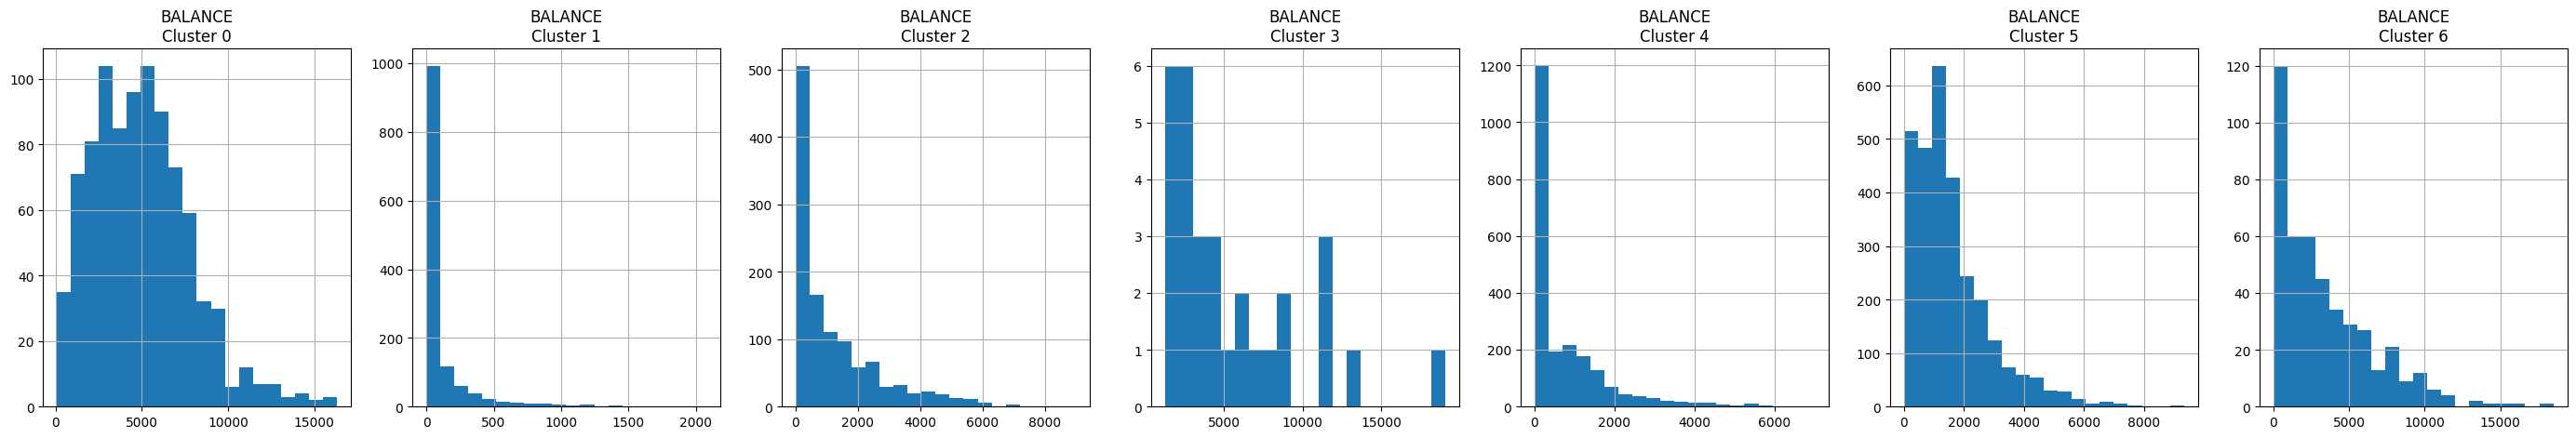

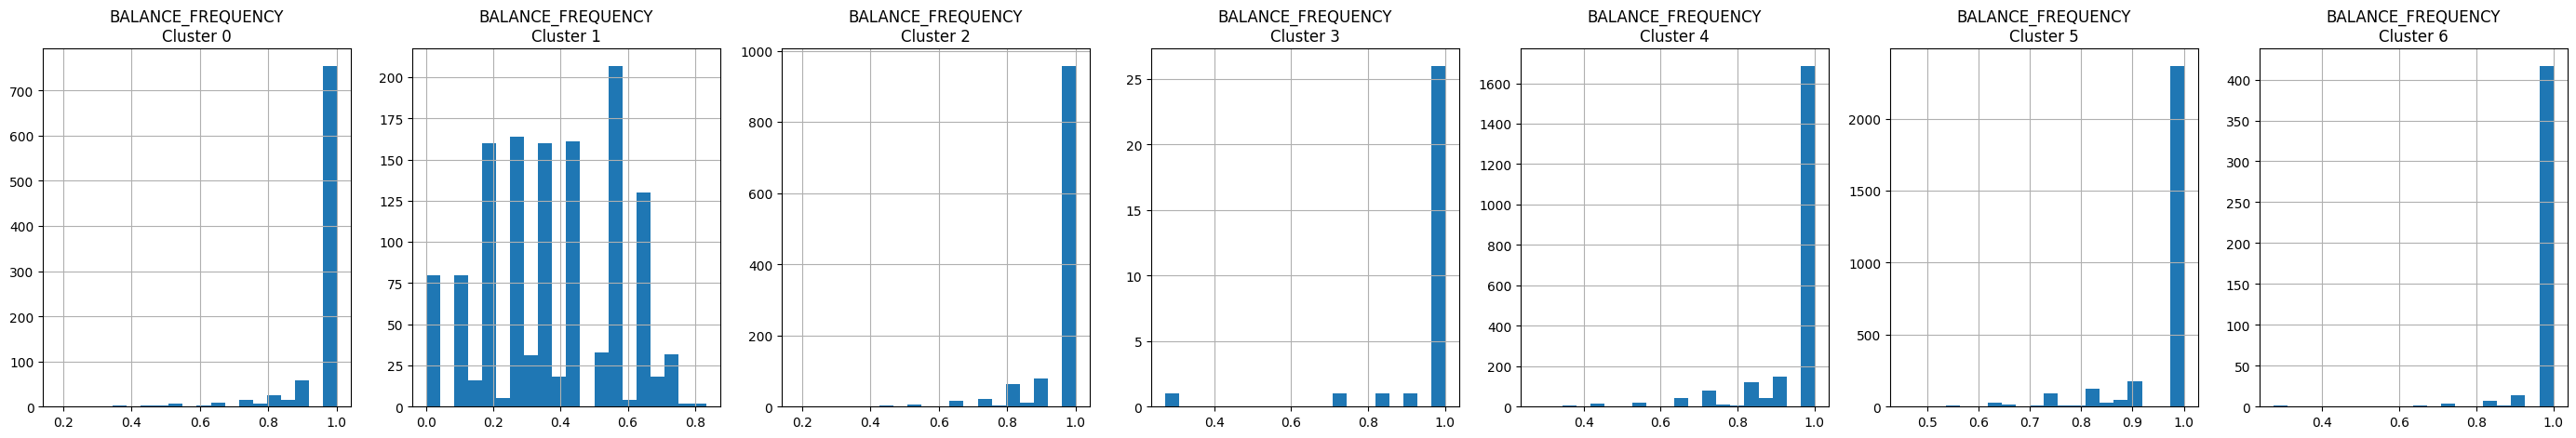

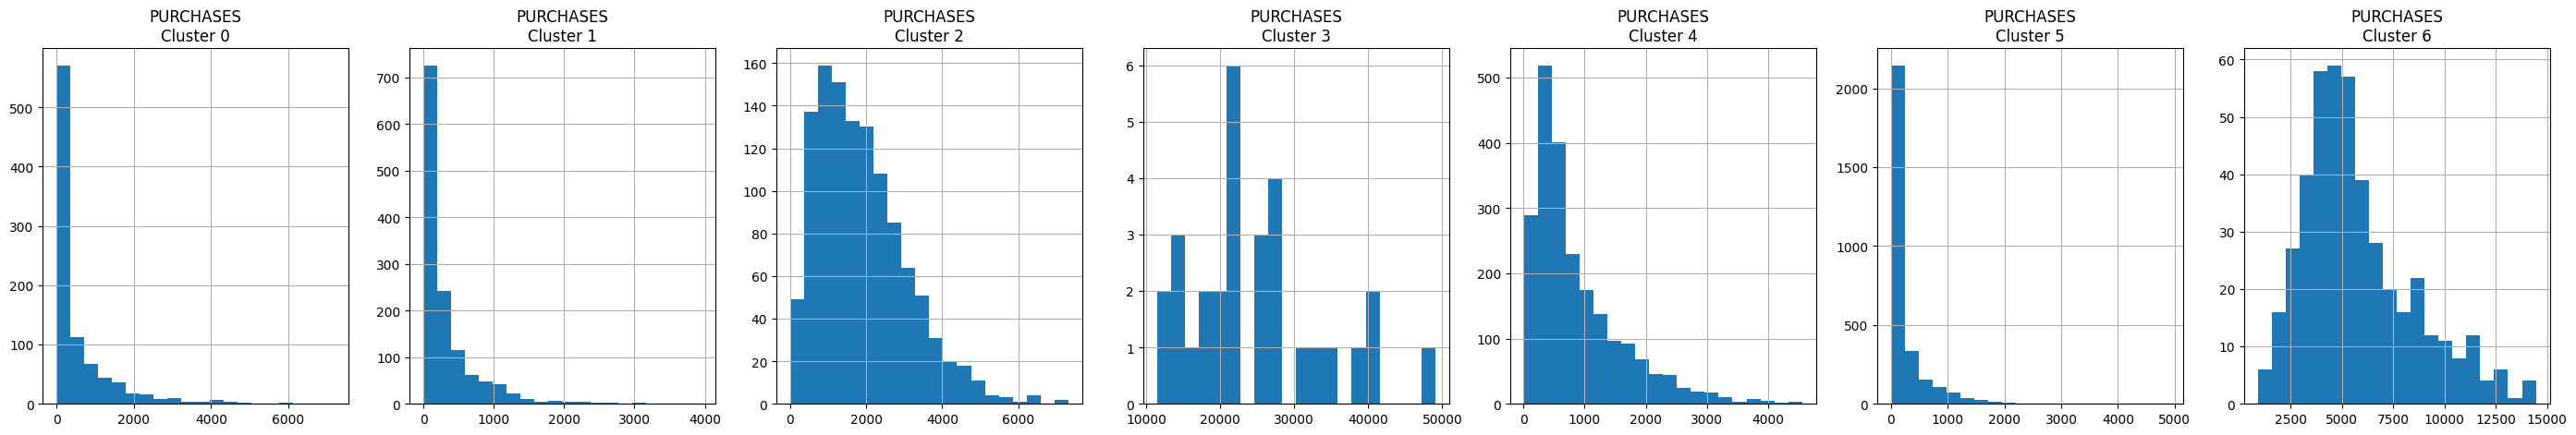

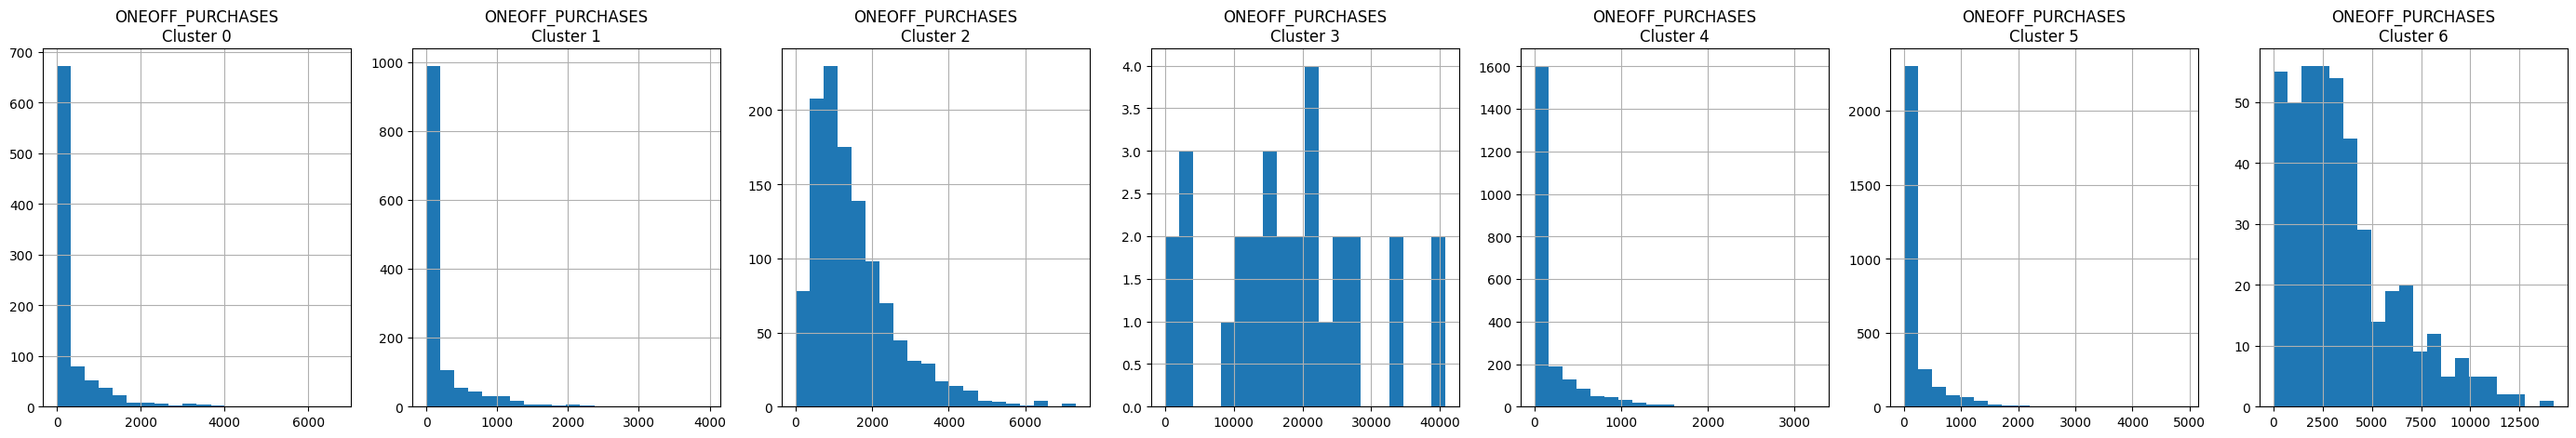

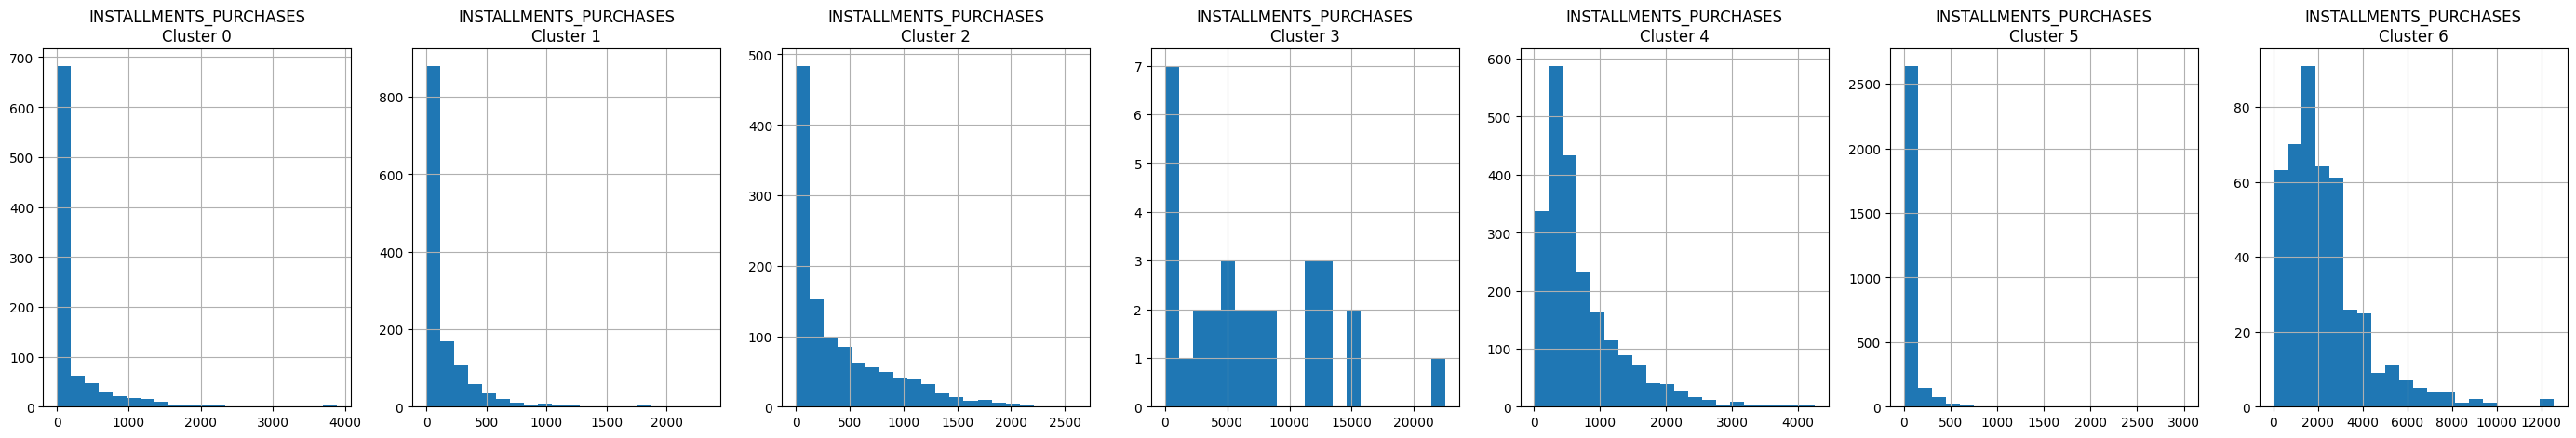

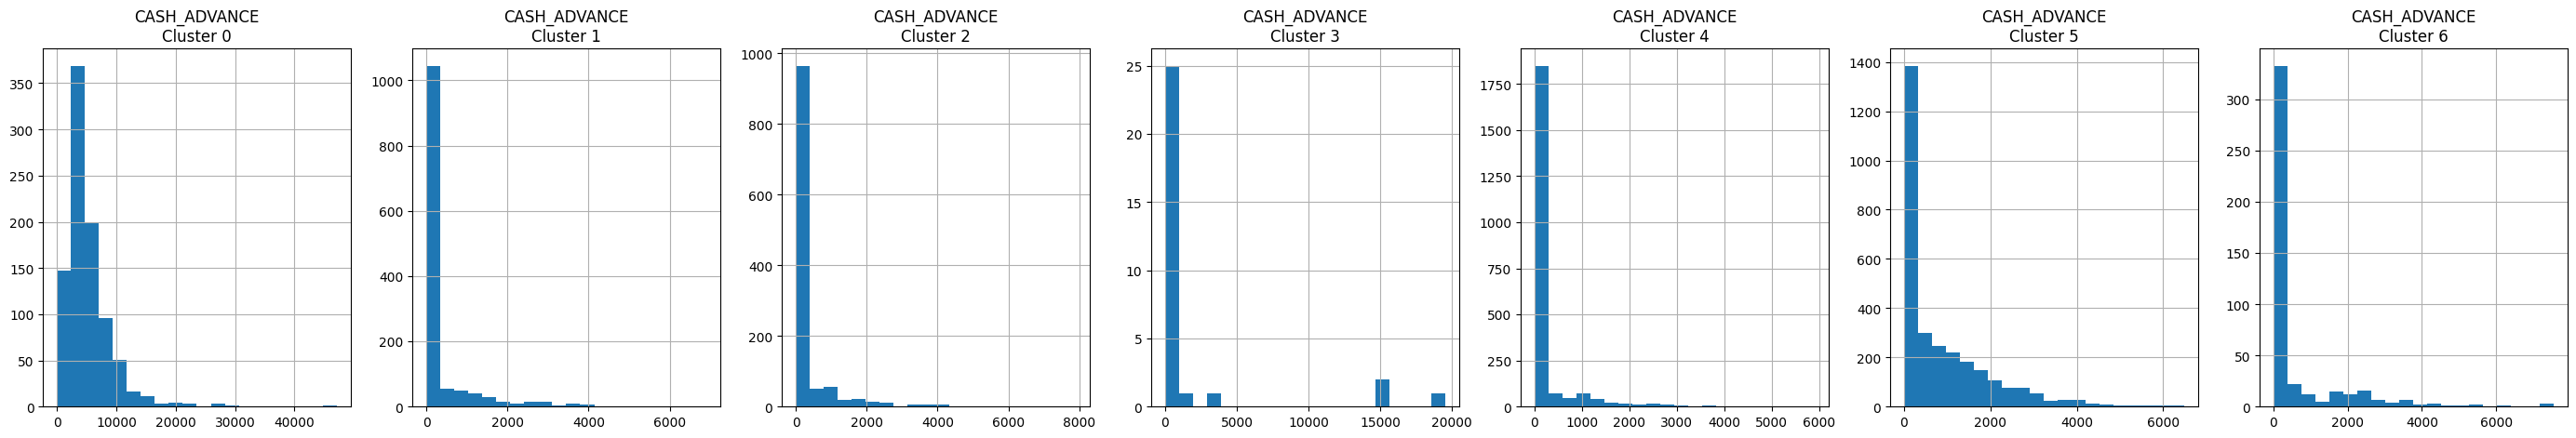

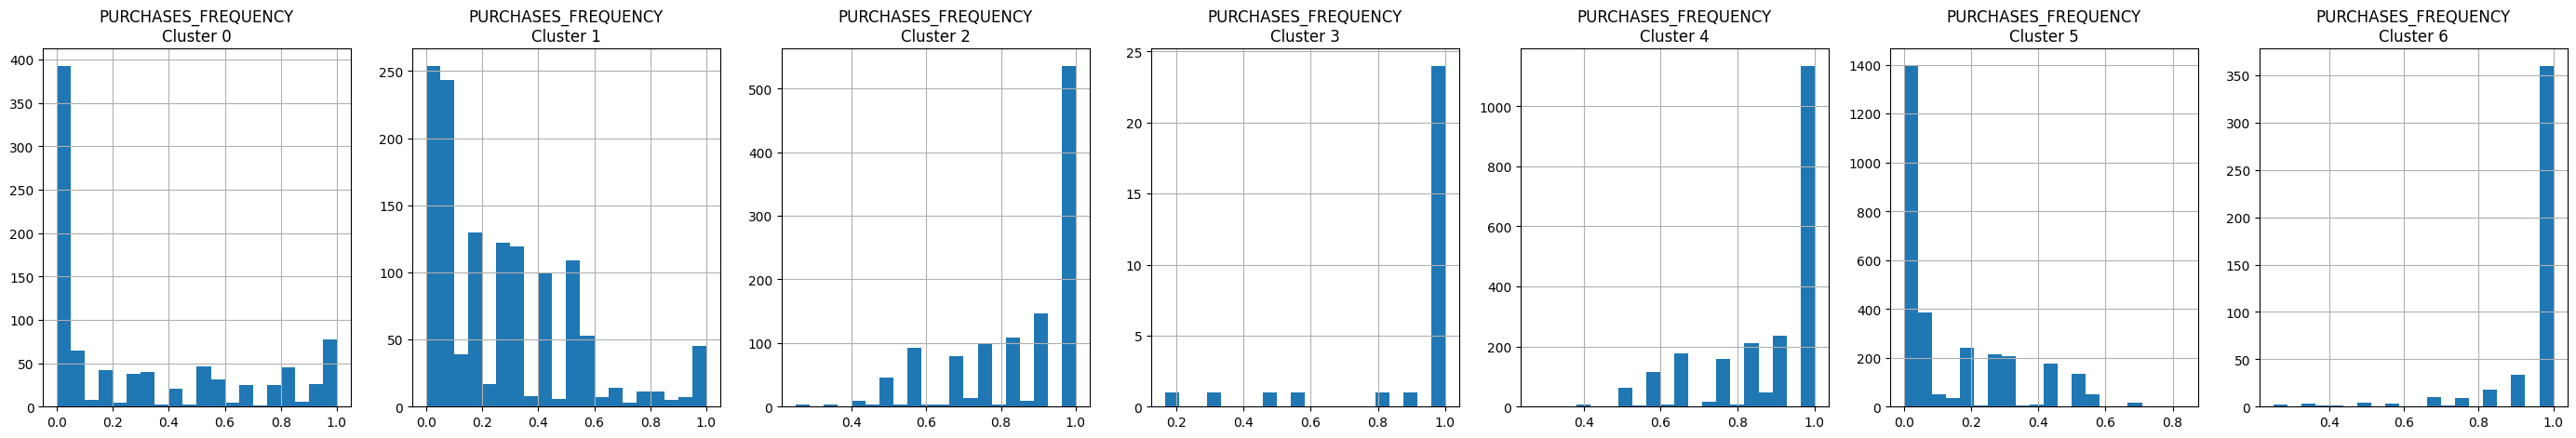

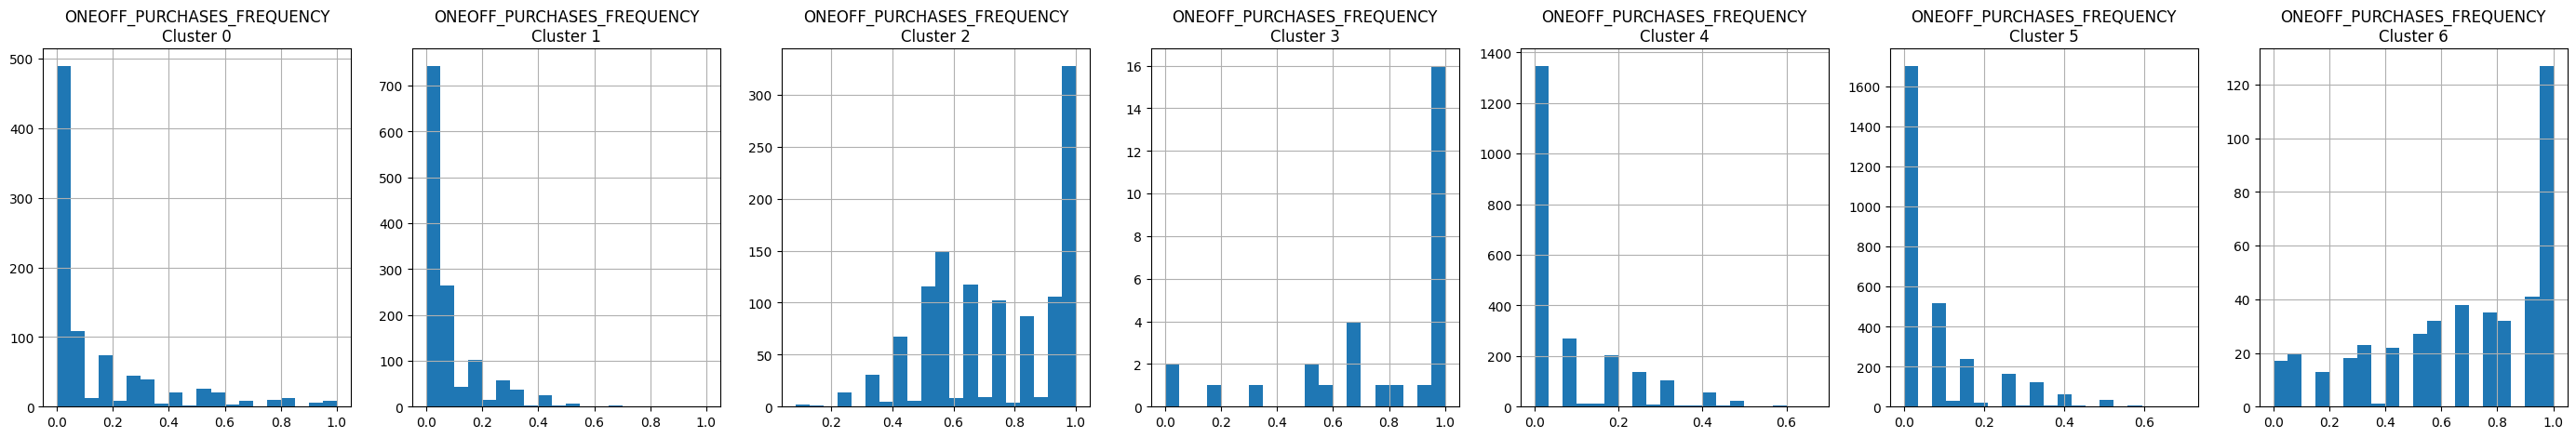

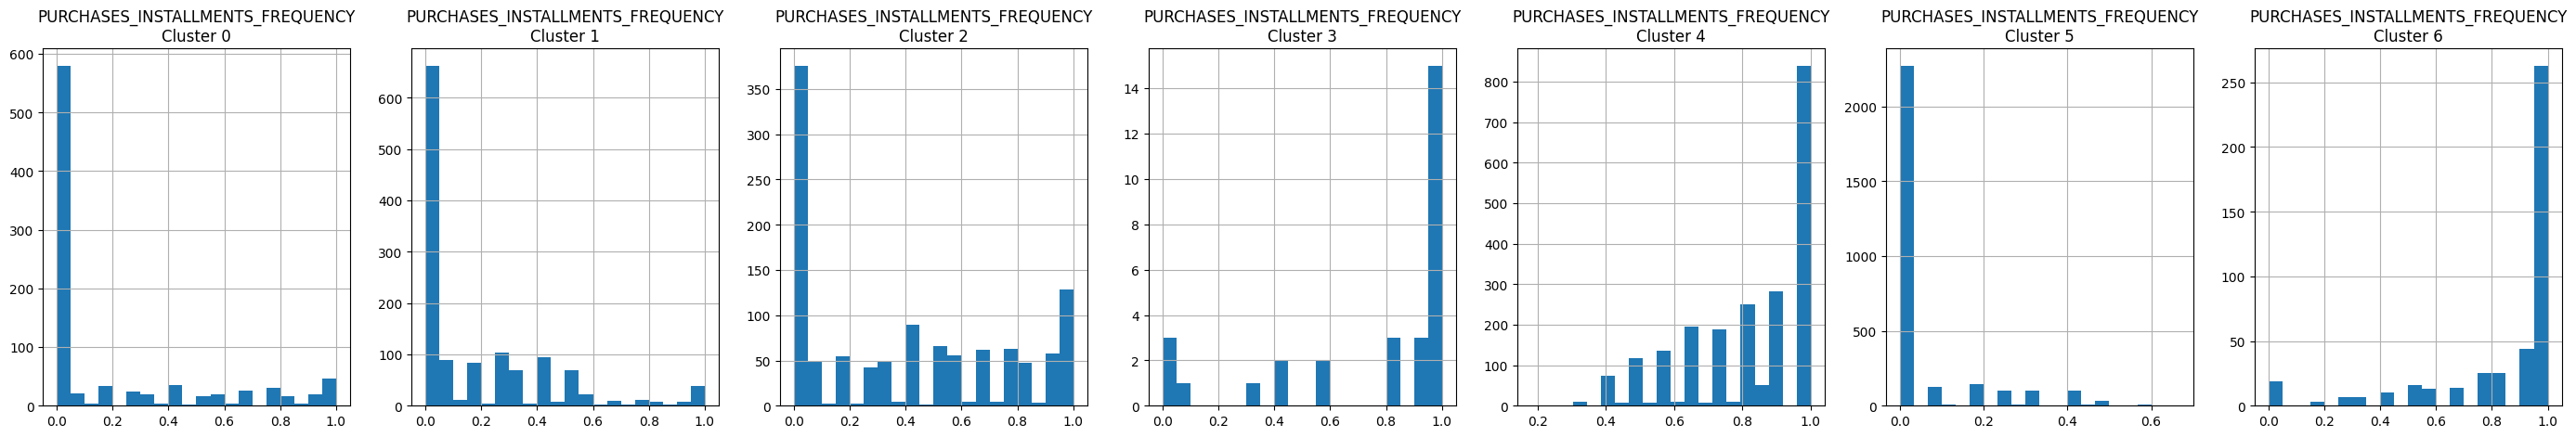

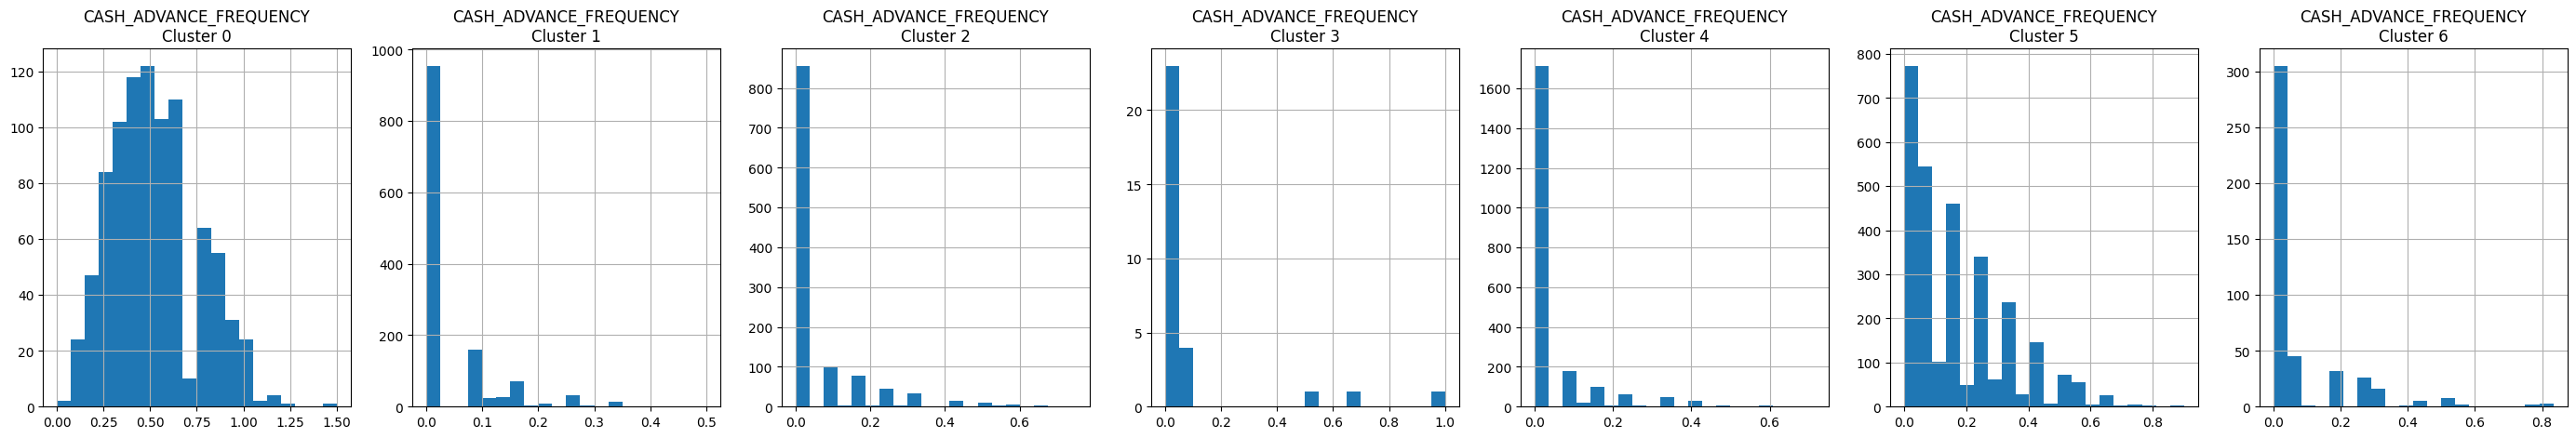

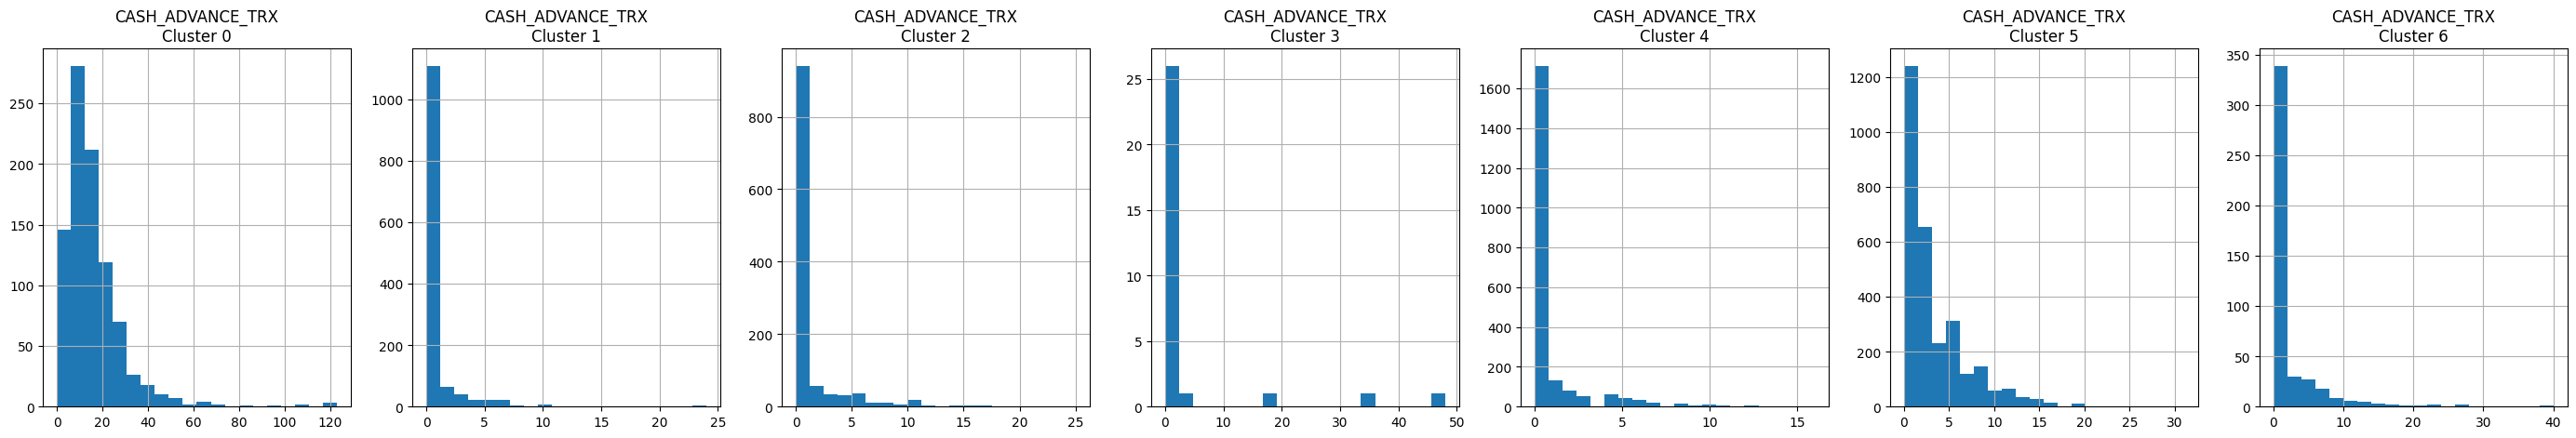

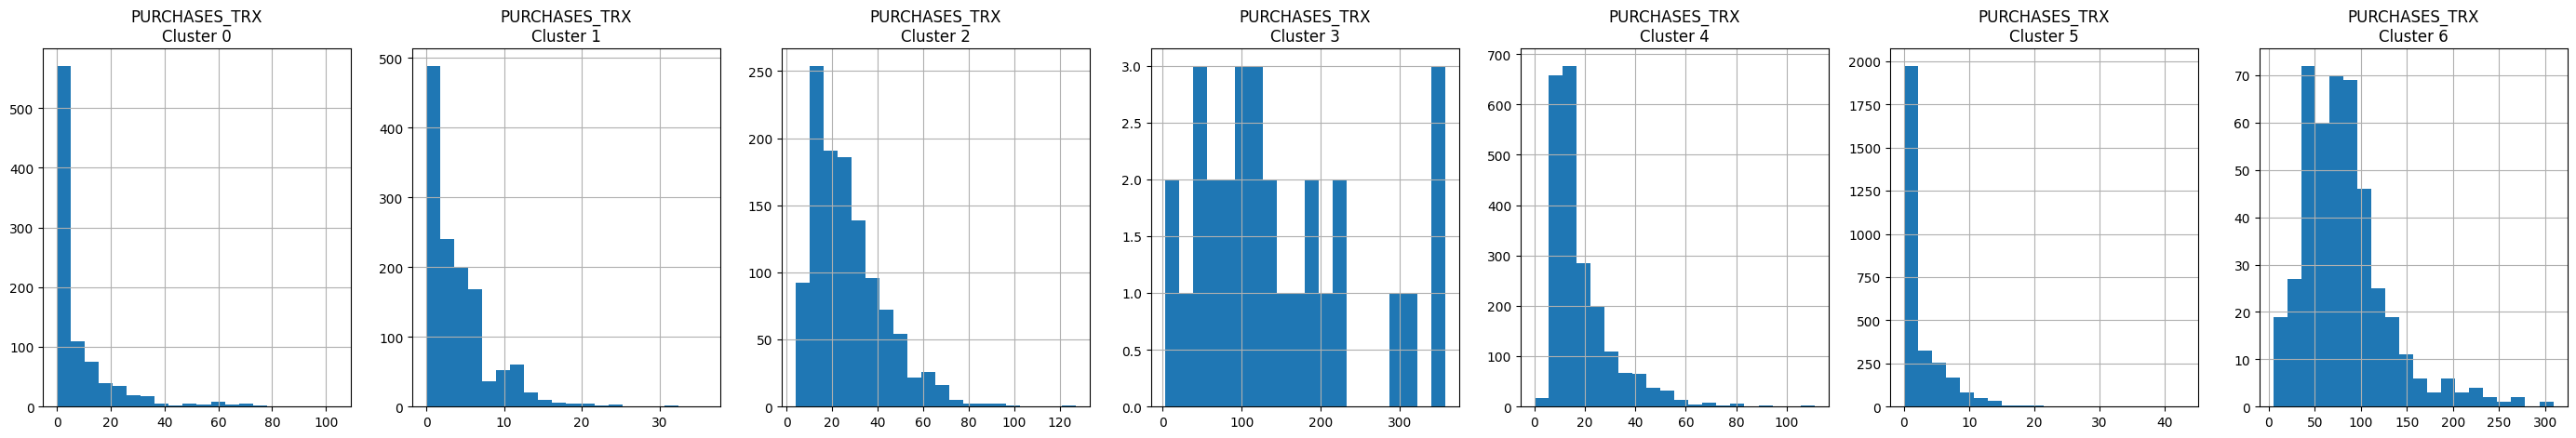

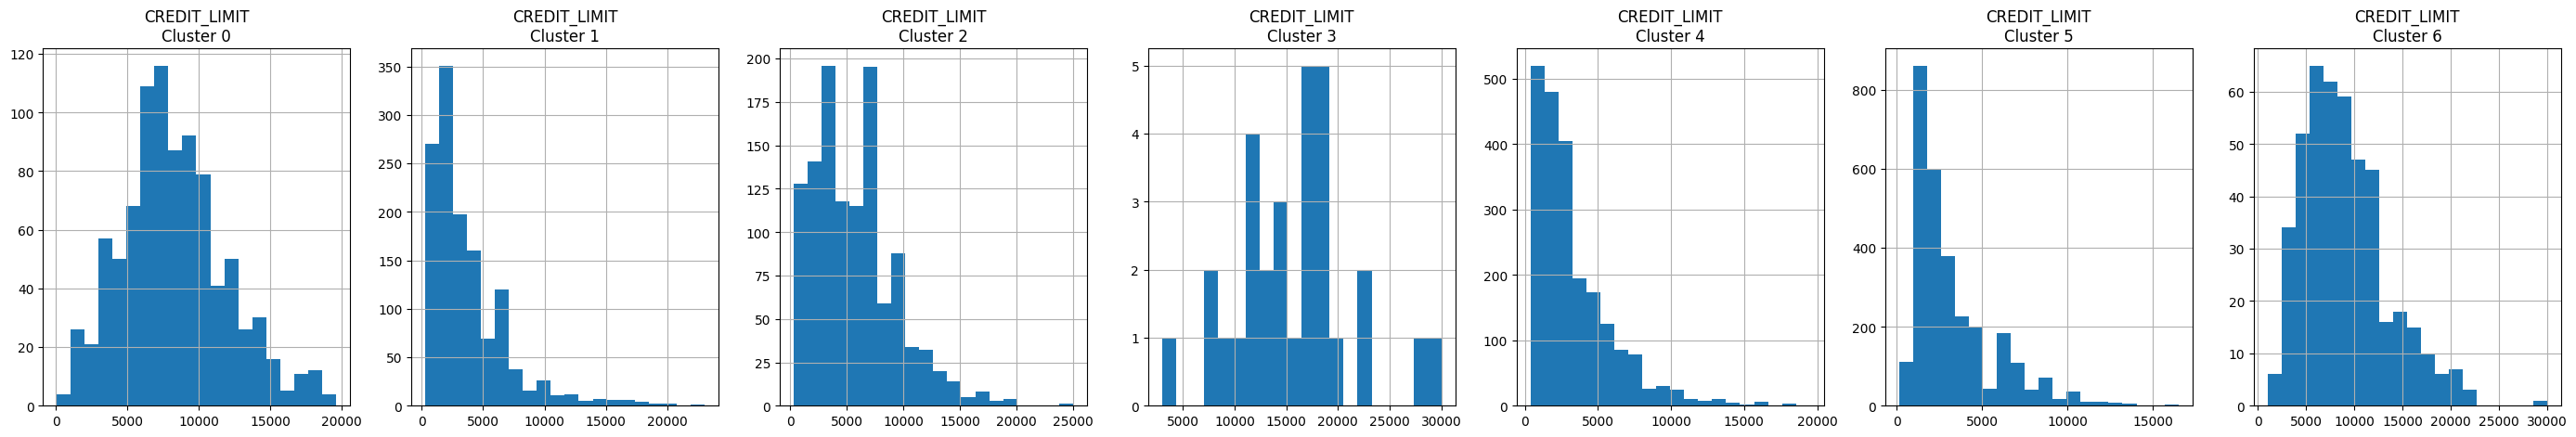

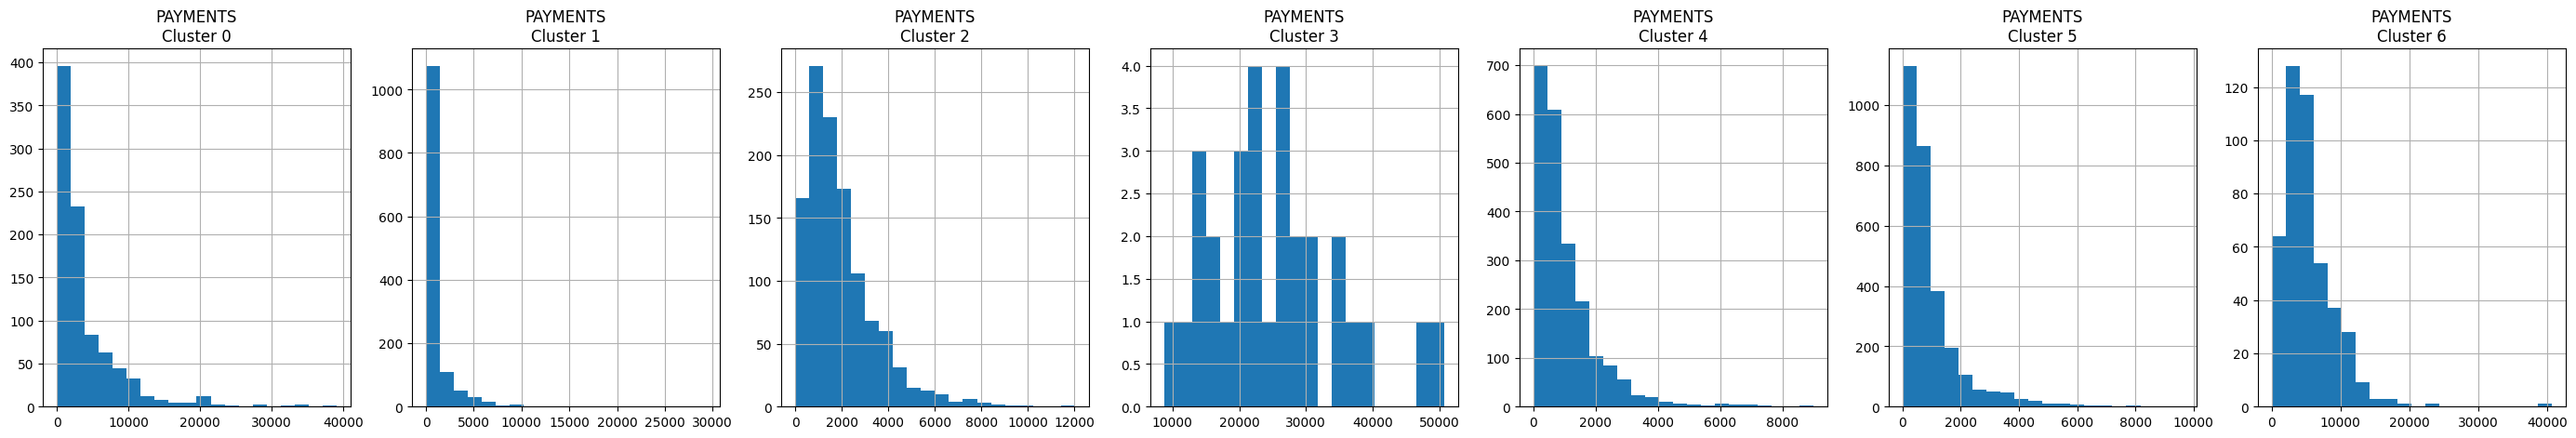

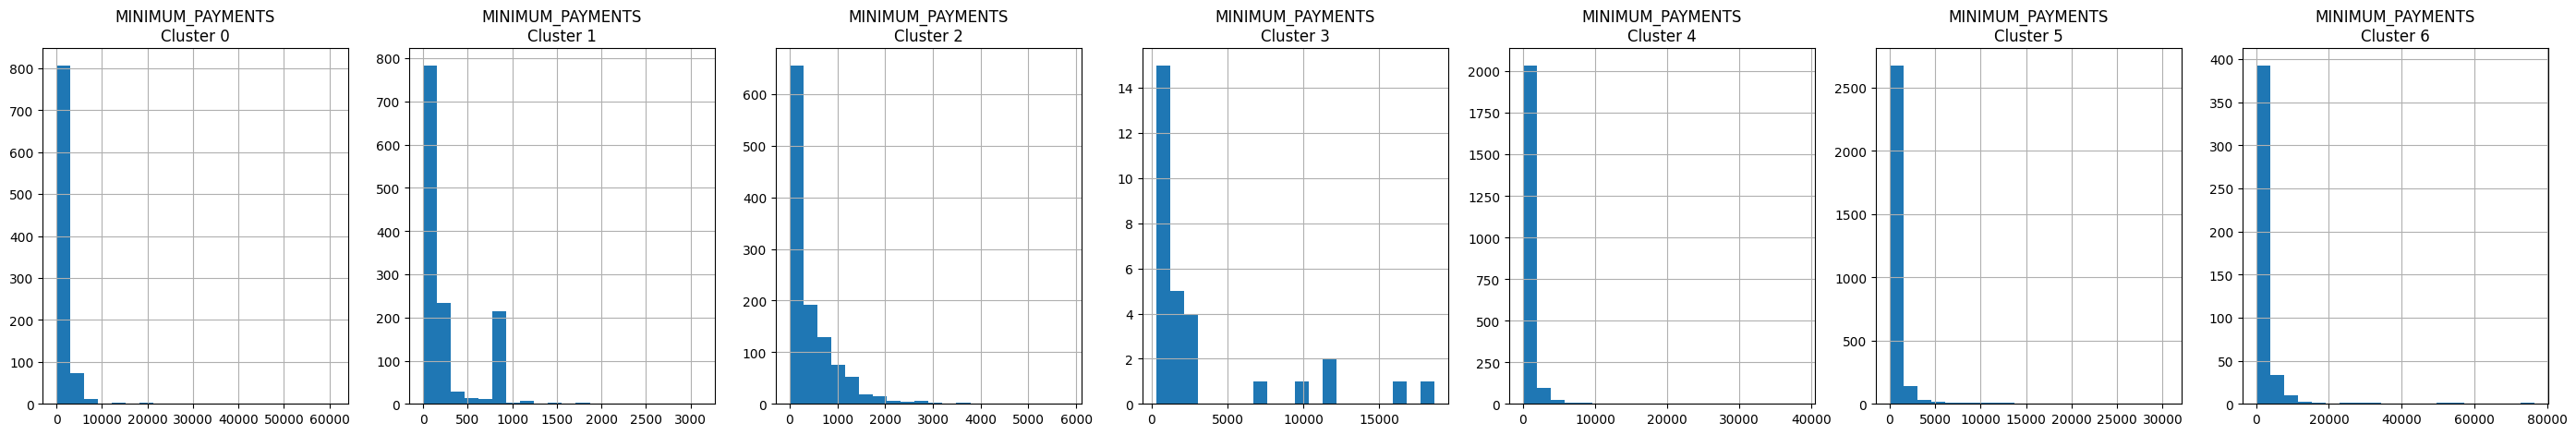

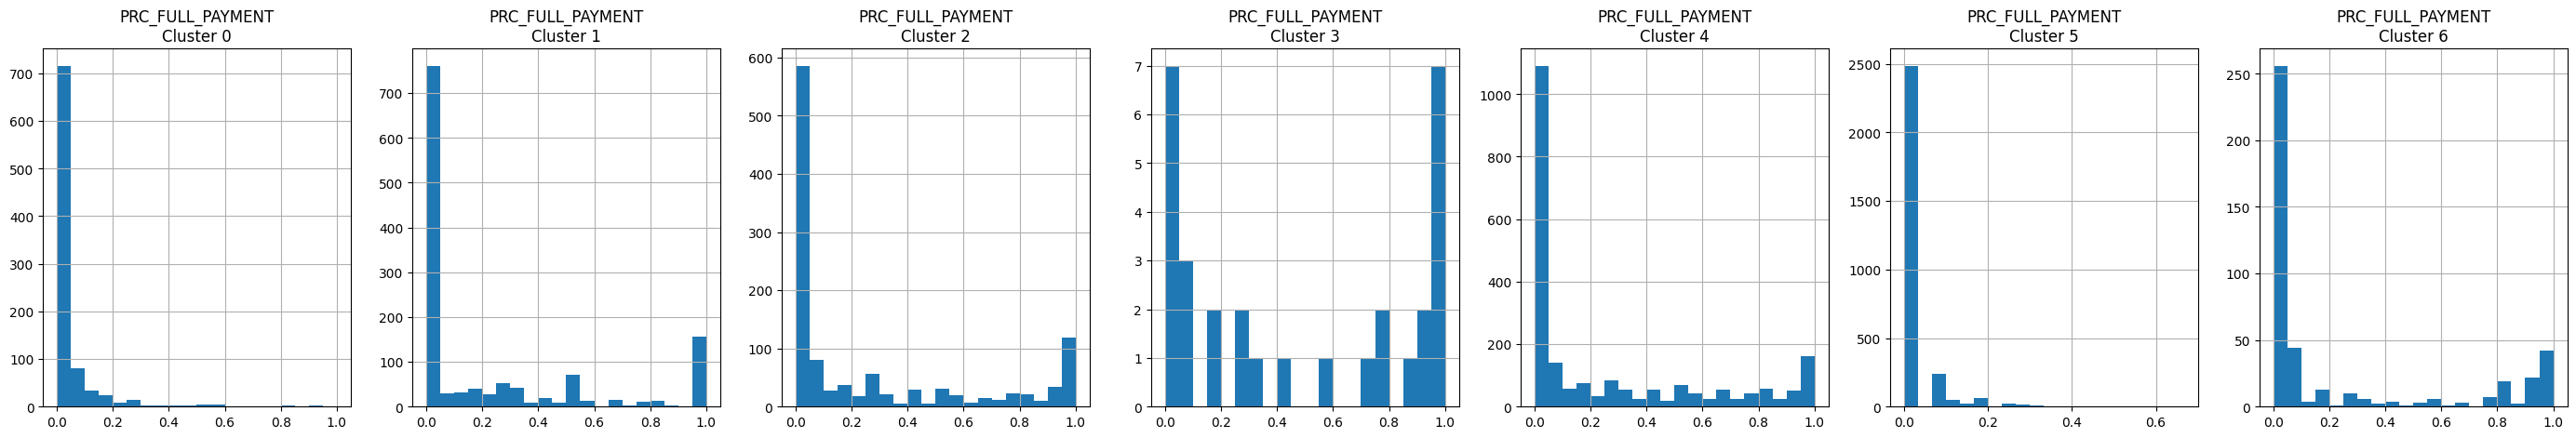

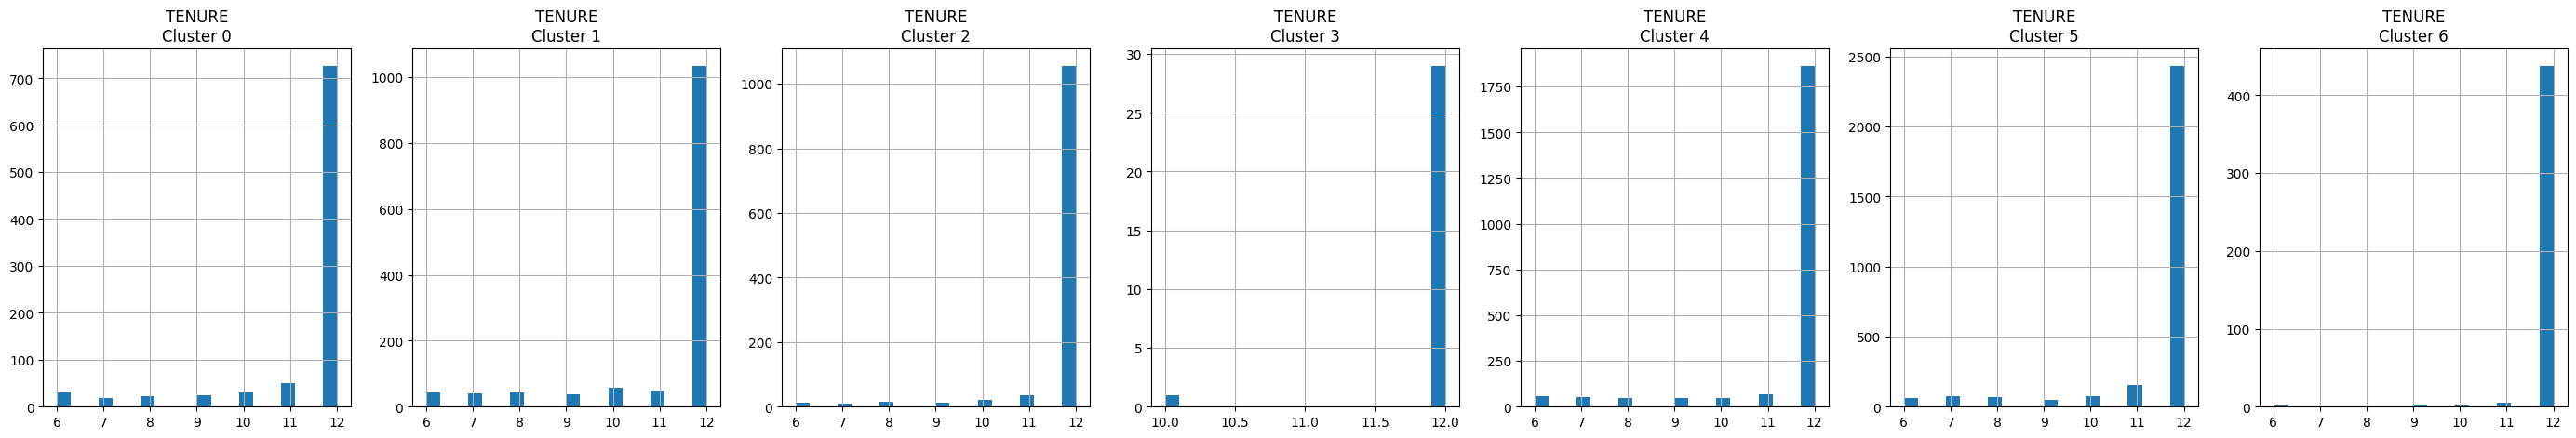

In [91]:
for i in data.columns:
    plt.figure(figsize=(35, 5))
    for j in range(7):
        plt.subplot(1, 7, j+1)
        cluster = data_cluster[data_cluster.cluster == j]
        cluster[i].hist(bins = 20)
        plt.title(f'{i}\nCluster {j}') 

plt.show()

In [92]:
pca = PCA(n_components=2)
principle_component = pca.fit_transform(scale_data)
principle_component

array([[-1.68222026, -1.07645061],
       [-1.1382949 ,  2.50647666],
       [ 0.96968401, -0.3835203 ],
       ...,
       [-0.92620364, -1.8107856 ],
       [-2.33655167, -0.65796601],
       [-0.55642216, -0.40046712]], shape=(8950, 2))

In [99]:
pca_df = pd.concat([pd.DataFrame(principle_component, columns=['pca1','pca2']), cluster_df], axis=1)

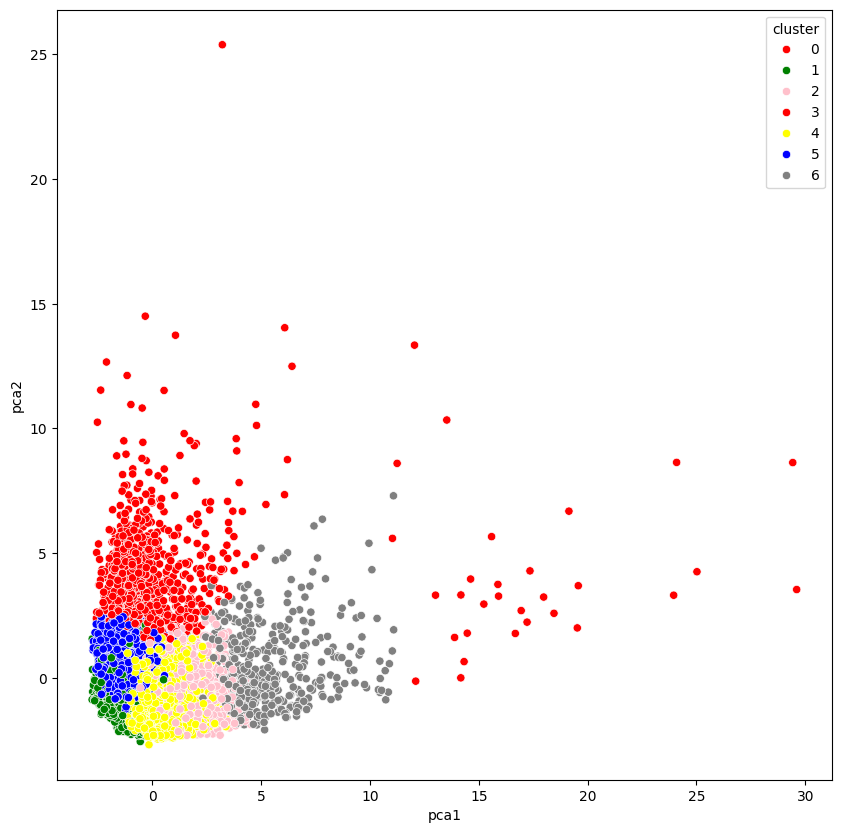

In [104]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster' , data=pca_df, palette=['red','green','pink','red','yellow','blue','gray'])
plt.show()

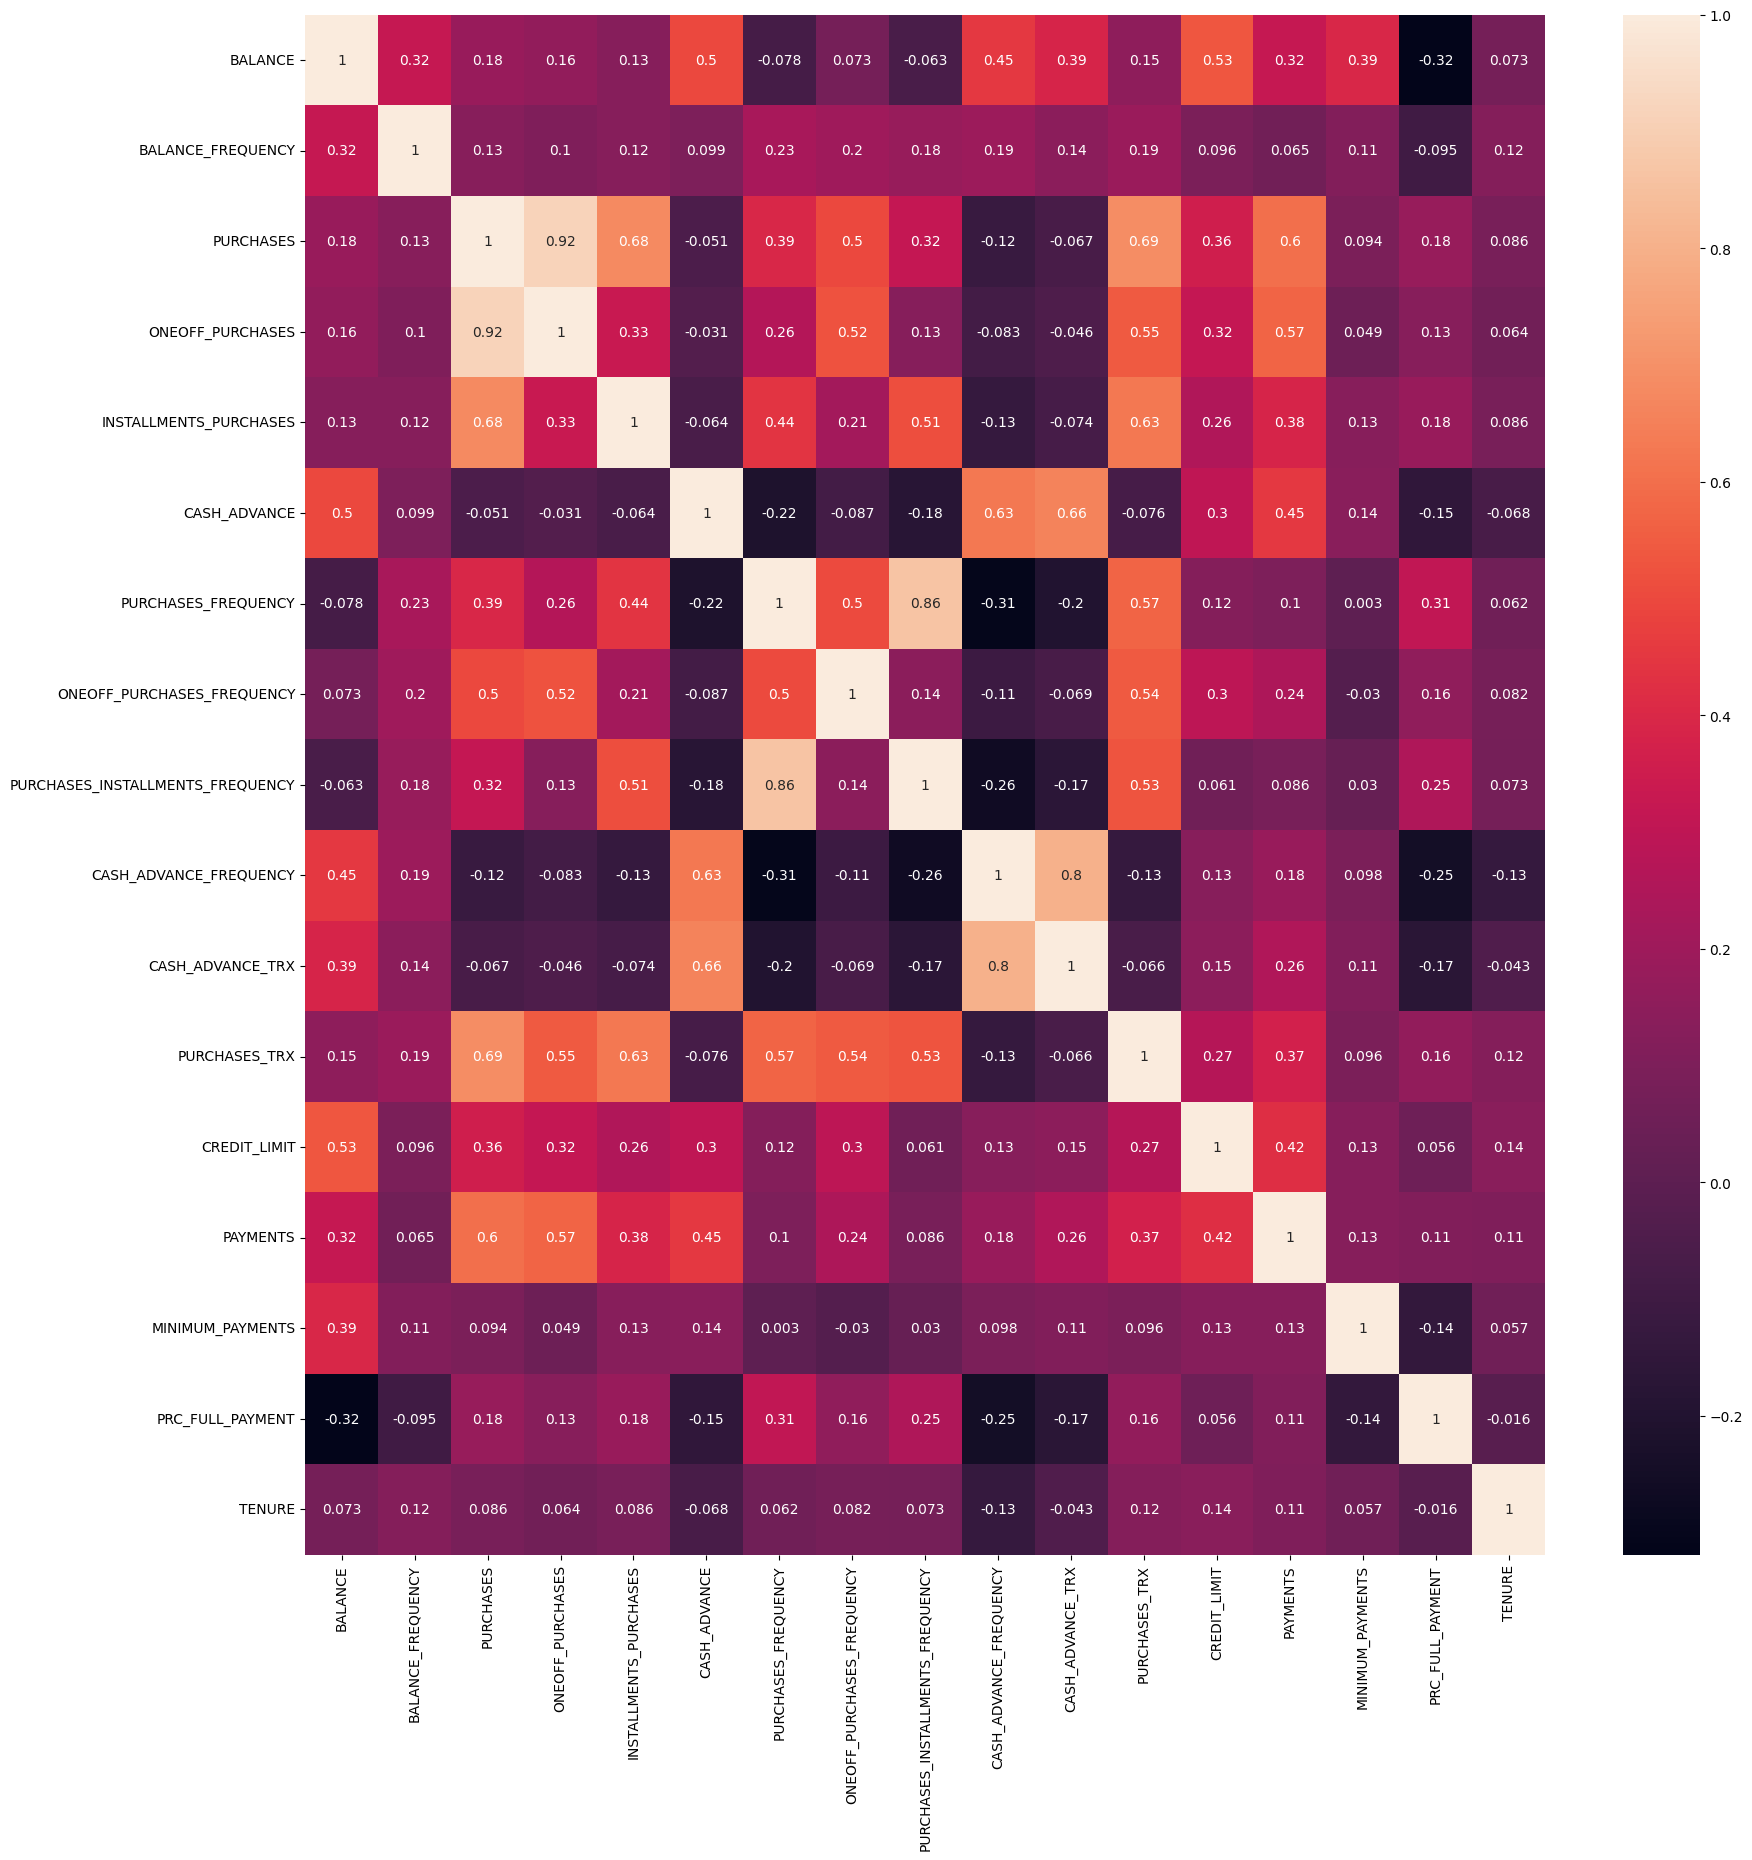

In [108]:
correlations = data.corr()
plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)
plt.show()